# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Read train and test excel sheets and store

In [2]:
train_df = pd.read_excel('./Data_Train.xlsx')
test_df = pd.read_excel('./Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Append test data in train excel data sheet

In [4]:
big_df = train_df.append(test_df,sort = False)
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


# Checking data types of all features

In [5]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Clean feature columns to extract useful info

In [6]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [7]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


# Change data type

In [8]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [9]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

# Remove unnecessary feature columns

In [10]:
big_df = big_df.drop(['Date_of_Journey'], axis=1)

In [11]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [12]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [13]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


# Check and fill null values

In [14]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [15]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [16]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')

In [17]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [18]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [19]:
big_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Stop                  0
dtype: int64

In [20]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [21]:
big_df = big_df.drop(['Total_Stops'], axis=1)

In [22]:
big_df['Stop'] = big_df['Stop'].astype(int)

In [23]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[1]

In [24]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)
big_df = big_df.drop(['Arrival_Time'], axis=1)

In [25]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [26]:
big_df['Departure_Hour'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'].str.split(':').str[1]
big_df = big_df.drop(['Dep_Time'], axis=1)

In [27]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)
big_df = big_df.drop(['Duration'], axis=1)

In [28]:
big_df.head(3)

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,9,6,2019,2,4,25,9,25


In [29]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [30]:
big_df.head(10)

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN
5,SpiceJet,Kolkata,Banglore,CCU → BLR,No info,3873.0,24,6,2019,0,11,25,9,0,CCU,BLR,NaN,NaN,NaN
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,In-flight meal not included,11087.0,12,3,2019,1,10,25,18,55,BLR,BOM,DEL,NaN,NaN
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,No info,22270.0,1,3,2019,1,5,5,8,0,BLR,BOM,DEL,NaN,NaN
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,In-flight meal not included,11087.0,12,3,2019,1,10,25,8,55,BLR,BOM,DEL,NaN,NaN
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,No info,8625.0,27,5,2019,1,19,15,11,25,DEL,BOM,COK,NaN,NaN


In [31]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [32]:
big_df = big_df.drop(['Route'], axis=1)

In [33]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [34]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

In [35]:
big_df.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Stop                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
dtype: object

In [36]:
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
#big_df["Source"]=encoder.fit_transform(big_df['Source'])
#big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
#big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
#big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
#big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
#big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
#big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
#big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [37]:
big_df.head(10)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
5,SpiceJet,Kolkata,Banglore,No info,3873.0,24,6,2019,0,11,25,9,0,CCU,BLR,None,None,None
6,Jet Airways,Banglore,New Delhi,In-flight meal not included,11087.0,12,3,2019,1,10,25,18,55,BLR,BOM,DEL,None,None
7,Jet Airways,Banglore,New Delhi,No info,22270.0,1,3,2019,1,5,5,8,0,BLR,BOM,DEL,None,None
8,Jet Airways,Banglore,New Delhi,In-flight meal not included,11087.0,12,3,2019,1,10,25,8,55,BLR,BOM,DEL,None,None
9,Multiple carriers,Delhi,Cochin,No info,8625.0,27,5,2019,1,19,15,11,25,DEL,BOM,COK,None,None


In [38]:
big_df.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Stop                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
dtype: object

In [39]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')
#big_df = np.array(ct.fit_transform(big_df),dtype = np.float)

In [40]:
big_df = big_df.drop(['Year'], axis=1)

In [41]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,1,21,35,16,50,BLR,NAG,DEL,None,None


# Converting categorical variables

In [42]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [43]:
big_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

# Removing/Eliminating low frequency features

In [44]:
top_8 = [x for x in big_df.Airline.value_counts().sort_values(ascending=False).head(8).index]

In [45]:
one_hot_top_x(big_df,'Airline',top_8)

In [46]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,...,Route_4,Route_5,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Air Asia,Airline_GoAir
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,0,1,10,...,None,None,0,1,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2,13,15,...,BLR,None,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2,4,25,...,COK,None,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,1,23,30,...,None,None,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,1,21,35,...,None,None,0,1,0,0,0,0,0,0


In [47]:
big_df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [48]:
top_5 = [x for x in big_df.Source.value_counts().sort_values(ascending=False).head(5).index]

In [49]:
one_hot_top_x(big_df,'Source',top_5)

In [50]:
big_df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [51]:
top_6 = [x for x in big_df.Destination.value_counts().sort_values(ascending=False).head(6).index]

In [52]:
one_hot_top_x(big_df,'Destination',top_6)

In [53]:
big_df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [54]:
top_3 = [x for x in big_df.Additional_Info.value_counts().sort_values(ascending=False).head(3).index]

In [55]:
one_hot_top_x(big_df,'Additional_Info',top_3)

In [56]:
big_df['Route_1'].value_counts()

DEL     5681
CCU     3581
BLR     2752
BOM      883
MAA      456
None       1
Name: Route_1, dtype: int64

In [57]:
top__5 = [x for x in big_df.Route_1.value_counts().sort_values(ascending=False).head(5).index]

In [58]:
one_hot_top_x(big_df,'Route_1',top__5)

In [59]:
big_df['Route_2'].value_counts()

BOM     4890
DEL     1941
BLR      896
DEL      822
HYD      785
HYD      714
CCU      456
JAI      341
MAA      327
AMD      317
BLR      294
COK      262
BBI      139
IDR      124
GAU      104
NAG       98
CCU       97
GOI       90
PNQ       77
LKO       72
IXR       66
BHO       66
ATQ       51
JDH       49
BDQ       46
IXB       25
TRV       24
RPR       23
UDR       23
COK       19
VGA       19
IXC       16
IXU       15
VNS       13
KNU       12
PAT       11
GWL       10
DED        6
STV        5
HBX        3
NDC        1
VTZ        1
None       1
IXA        1
JLR        1
IXZ        1
Name: Route_2, dtype: int64

In [60]:
top_13 = [x for x in big_df.Route_2.value_counts().sort_values(ascending=False).head(13).index]

In [61]:
one_hot_top_x(big_df,'Route_2',top_13)

In [62]:
big_df['Route_3'].value_counts()

None    4341
COK     4015
BLR     2280
BOM     1345
DEL      703
DEL      150
MAA      102
COK       95
HYD       58
AMD       53
NAG       33
GOI       23
IDR       19
BBI       18
VGA       18
HYD       16
GAU       15
BHO       14
PNQ       11
HBX        8
JDH        7
ISK        5
IMF        5
VTZ        4
UDR        4
TRV        3
IXR        3
IXC        3
TIR        1
JAI        1
CCU        1
Name: Route_3, dtype: int64

In [63]:
top_6 = [x for x in big_df.Route_3.value_counts().sort_values(ascending=False).head(6).index]

In [64]:
one_hot_top_x(big_df,'Route_3',top_6)

In [65]:
big_df['Route_4'].value_counts()

None    11397
COK      1373
BLR       390
DEL        98
HYD        38
BOM        33
DEL         9
TRV         5
HYD         4
GWL         3
BBI         1
NAG         1
AMD         1
BHO         1
Name: Route_4, dtype: int64

In [66]:
top__3 = [x for x in big_df.Route_4.value_counts().sort_values(ascending=False).head(3).index]

In [67]:
one_hot_top_x(big_df,'Route_4',top__3)

In [68]:
big_df['Route_5'].value_counts()

None    13296
COK        31
BLR        15
DEL         8
VGA         2
HYD         2
Name: Route_5, dtype: int64

In [69]:
top_1 = [x for x in big_df.Route_5.value_counts().sort_values(ascending=False).head(1).index]

In [70]:
one_hot_top_x(big_df,'Route_5',top_1)

In [71]:
big_df = big_df.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'], axis=1)

In [72]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 58 columns):
Price                                           10683 non-null float64
Date                                            13354 non-null int32
Month                                           13354 non-null int32
Stop                                            13354 non-null int32
Arrival_Hour                                    13354 non-null int32
Arrival_Minute                                  13354 non-null int32
Departure_Hour                                  13354 non-null int32
Departure_Minute                                13354 non-null int32
Airline_Jet Airways                             13354 non-null int32
Airline_IndiGo                                  13354 non-null int32
Airline_Air India                               13354 non-null int32
Airline_Multiple carriers                       13354 non-null int32
Airline_SpiceJet                                13354 non-null

In [73]:
m_data = big_df[0:10683]

In [74]:
X_train = m_data[0:10683]
X_train = X_train.drop(['Price'], axis=1)

In [75]:
y_train = m_data['Price']

In [76]:
X_train.tail()


,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,...,Route_3_None,Route_3_COK,Route_3_BLR,Route_3_BOM,Route_3_DEL,Route_3_DEL,Route_4_None,Route_4_COK,Route_4_BLR,Route_5_None
10678,9,4,0,22,25,19,55,0,0,0,...,1,0,0,0,0,0,1,0,0,1
10679,27,4,0,23,20,20,45,0,0,1,...,1,0,0,0,0,0,1,0,0,1
10680,27,4,0,11,20,8,20,1,0,0,...,1,0,0,0,0,0,1,0,0,1
10681,1,3,0,14,10,11,30,0,0,0,...,1,0,0,0,0,0,1,0,0,1
10682,9,5,2,19,15,10,55,0,0,1,...,0,0,0,1,0,0,0,1,0,1


In [77]:
y_train.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [78]:
X_test = big_df[10683:]

In [79]:
X_test = X_test.drop(['Price'], axis=1)
X_test.head()

,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,...,Route_3_None,Route_3_COK,Route_3_BLR,Route_3_BOM,Route_3_DEL,Route_3_DEL,Route_4_None,Route_4_COK,Route_4_BLR,Route_5_None
0,6,6,1,4,25,17,30,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,12,5,1,10,20,6,20,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,21,5,1,19,0,19,15,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,21,5,1,21,0,8,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,24,6,0,2,45,23,55,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [80]:
X_train.shape

(10683, 57)

In [81]:
y_train.shape

(10683,)

# Plot graph b/w X_train and y_train

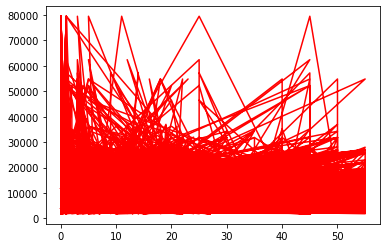

In [82]:
plt.plot(X_train, y_train, color = 'red')

# Now Apply Models Of ML For Price Prediction

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,criterion='mse')
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [93]:
y_test = regressor.predict(X_test)

In [94]:
y_test

array([14714. ,  4226. , 12898. , ..., 15648.5, 13672.2,  7640.8])

In [95]:
X_train.shape

(10683, 57)

In [96]:
y_train.shape

(10683,)

# Plot graph b/w X_train and predicted value using model

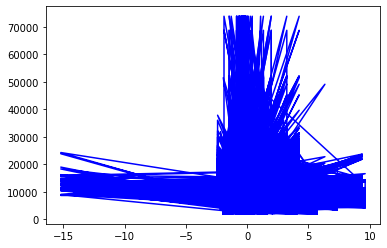

In [97]:
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

# Plot graph b/w X_test and predicted value using model

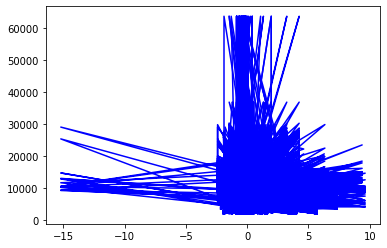

In [98]:
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

# Storing all predicted value in a dataframe

In [100]:
df = pd.DataFrame (y_test)
filepath = 'my_sub_rd1.xlsx'
df.to_excel(filepath, index=False)